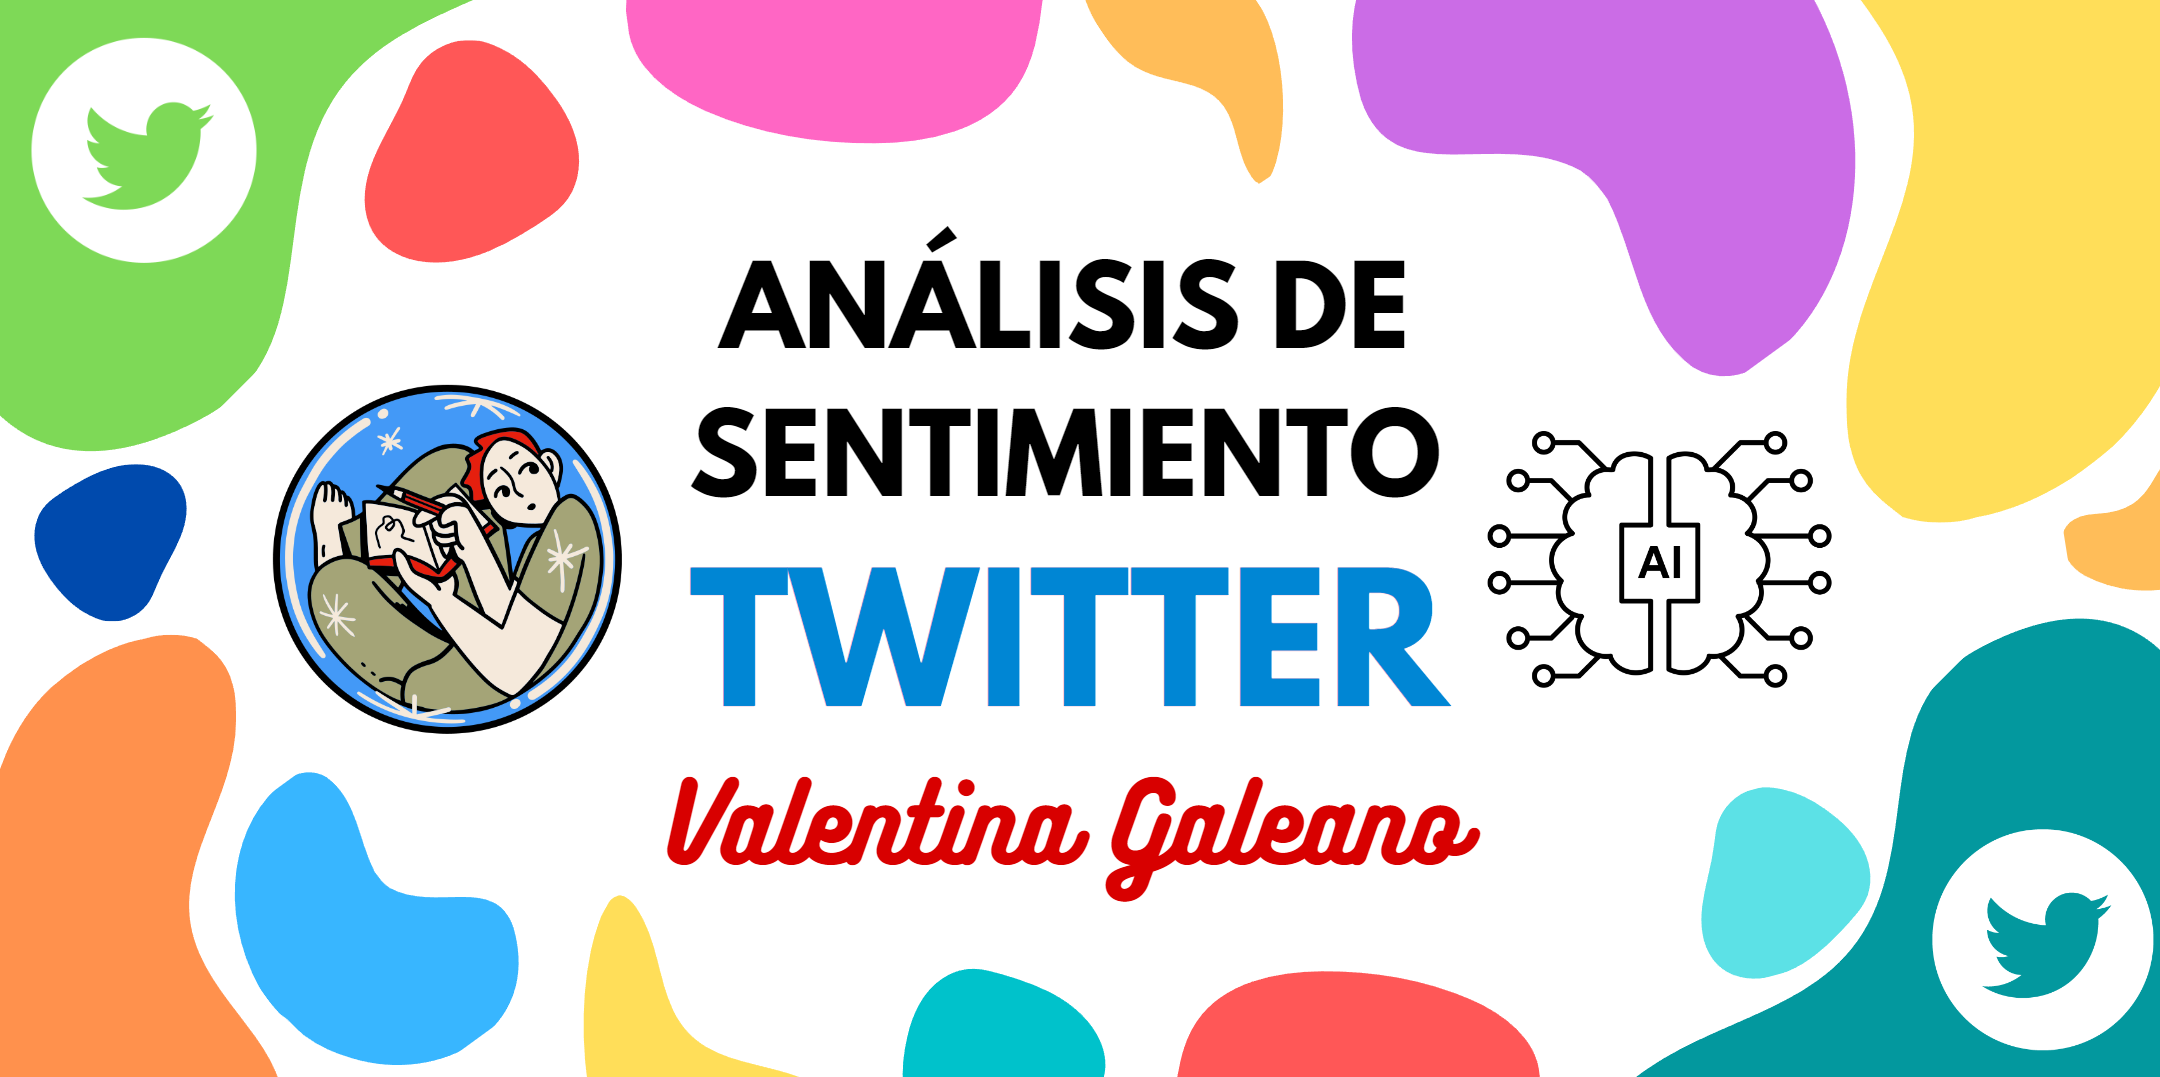

#**Cygnus IA análisis de sentimientos**
###Proyecto final Inteligencia Artificial desarrollado por *Valentina Galeano Castro* que pueda analizar el sentimiento en textos obtenidos de una serie de tweets en un parametro de tiempo con la caracteristica de que se puede establecer cualquier tipo de consulta en la red social. Esto podría ser utilizado para Analizar las opiniones de los usuarios, medir la satisfacción de las personas respecto a un tema, tener un panorama más amplio en un determinado debate, etc.

* Los pasos generales utilizados para abordar el proyecto fueron: Recopilación de datos, pre-procesamiento, limpieza y procesamiento de datos, configuración del modelo, entrenamiento del modelo, evaluación del modelo, integración, pruebas y una pequeña demostración gráfica.

* Para recopliar los datos se utilizó la técnica de web scraping y se tomaron 500 tweets en la consulta avanzada establecida.

In [ ]:
!pip install snscrape

In [2]:
import tweepy
import time
import json
import pandas as pd
import os
import snscrape.modules.twitter as sntwitter
import pandas as pd
import tweepy 
from textblob import TextBlob 
from wordcloud import WordCloud
import numpy as np 
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#@title **Autenticación API v2 Twitter**
API_KEY = ""
API_SECRET = ""
BEARER_TOKEN = ""
ACCESS_TOKEN = ""
ACCESS_TOKEN_SECRET = ""

In [ ]:
#@title **Tweets**
query = "(from:POTUS OR from:elonmusk) until:2023-02-14 since:2020-01-01 -filter:links"
tweets = []
limit = 500

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.username, tweet.content, tweet.likeCount])
        
df = pd.DataFrame(tweets, columns=['User','Tweet','likes'])

#df = df.loc[df['likes'] >= 10]

print(df)

<ipython-input-3-781a02cc79d4>:11: FutureWarning: username is deprecated, use user.username instead
  tweets.append([tweet.username, tweet.content, tweet.likeCount])
<ipython-input-3-781a02cc79d4>:11: FutureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.username, tweet.content, tweet.likeCount])


         User                                              Tweet   likes
0    elonmusk  @Teslarati @ResidentSponge Thanks on behalf of...   52571
1       POTUS  Just as every police officer has a right to re...   21875
2    elonmusk  @andst7 Vanity Unfair has fallen so far (sigh)...   47219
3    elonmusk                                  @pedrodias Agreed    6564
4    elonmusk                   @visegrad24 This dude is awesome   87326
..        ...                                                ...     ...
495  elonmusk  Changed my name to Mr. Tweet, now Twitter won’...  915387
496  elonmusk                    @BLKMDL3 Same, Mexico rocks! 🇲🇽   53512
497     POTUS                    American manufacturing is back.   40532
498  elonmusk                         @udiWertheimer @BillyM2k 🤣    3511
499  elonmusk  @ScottAdamsSays Yes, but this was not disclose...   31894

[500 rows x 3 columns]


In [ ]:
df.head(15)

,User,Tweet,likes
0,elonmusk,@Teslarati @ResidentSponge Thanks on behalf of...,52571
1,POTUS,Just as every police officer has a right to re...,21875
2,elonmusk,@andst7 Vanity Unfair has fallen so far (sigh)...,47219
3,elonmusk,@pedrodias Agreed,6564
4,elonmusk,@visegrad24 This dude is awesome,87326
5,elonmusk,@MikhailaFuller @jordanbpeterson 😠,54474
6,elonmusk,@Brian_J_Berger 🤣🤣 🎈🎈,8117
7,elonmusk,@TheBabylonBee 🤣,12532
8,elonmusk,@Anna_Giaritelli Immigrants from China &amp; o...,2814
9,elonmusk,@Anna_Giaritelli I am very much in favor of ha...,4582


In [ ]:
# Descargar un archivo de Excel con la info
df.to_excel('sd.xlsx')
from google.colab import files
files.download('sd.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def clean_text(text):
  text = re.sub(r'@[A-Za-z09]+', '', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?:\/\/?', '', text)

  return text

df['Tweet'] = df['Tweet'].apply(clean_text)
df.head(15)

,User,Tweet,likes
0,elonmusk,Thanks on behalf of the Tesla team!,52571
1,POTUS,Just as every police officer has a right to re...,21875
2,elonmusk,7 Vanity Unfair has fallen so far (sigh). Plea...,47219
3,elonmusk,Agreed,6564
4,elonmusk,24 This dude is awesome,87326
5,elonmusk,😠,54474
6,elonmusk,_J_Berger 🤣🤣 🎈🎈,8117
7,elonmusk,🤣,12532
8,elonmusk,_Giaritelli Immigrants from China &amp; other ...,2814
9,elonmusk,_Giaritelli I am very much in favor of hard-wo...,4582


In [ ]:
def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
df['Subjectivity'] = df['Tweet'].apply(get_subjectivity)
df['Polarity'] = df['Tweet'].apply(get_polarity)

df.head()

,User,Tweet,likes,Subjectivity,Polarity
0,elonmusk,Thanks on behalf of the Tesla team!,52571,0.200000,0.250000
1,POTUS,Just as every police officer has a right to re...,21875,0.467262,0.321429
2,elonmusk,7 Vanity Unfair has fallen so far (sigh). Plea...,47219,0.666667,-0.133333
3,elonmusk,Agreed,6564,0.000000,0.000000
4,elonmusk,24 This dude is awesome,87326,1.000000,1.000000


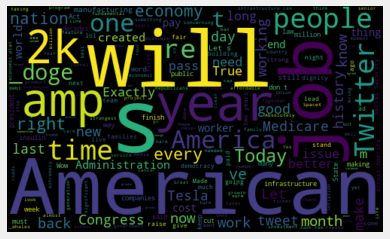

In [ ]:
all_words = ' '.join( [twts for twts in df['Tweet']])
word_Cloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(all_words)

plt.imshow(word_Cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
def analysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
     return 'Neutral'
  # else:
  #   return 'Positive'
  elif score > 0:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(analysis)

df

,User,Tweet,likes,Subjectivity,Polarity,Analysis
0,elonmusk,Thanks on behalf of the Tesla team!,52571,0.200000,0.250000,Positive
1,POTUS,Just as every police officer has a right to re...,21875,0.467262,0.321429,Positive
2,elonmusk,7 Vanity Unfair has fallen so far (sigh). Plea...,47219,0.666667,-0.133333,Negative
3,elonmusk,Agreed,6564,0.000000,0.000000,Neutral
4,elonmusk,24 This dude is awesome,87326,1.000000,1.000000,Positive
...,...,...,...,...,...,...
495,elonmusk,"Changed my name to Mr. Tweet, now Twitter won’...",915387,0.000000,0.000000,Neutral
496,elonmusk,"3 Same, Mexico rocks! 🇲🇽",53512,0.125000,0.000000,Neutral
497,POTUS,American manufacturing is back.,40532,0.000000,0.000000,Neutral
498,elonmusk,2k 🤣,3511,0.000000,0.000000,Neutral


In [ ]:
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') ' + sortedDF['Tweet'][i])
    print()
    j += 1

1)   Thanks on behalf of the Tesla team!

2) Just as every police officer has a right to return home safely at night – so does everybody else.

Get officers the training they need.
Hold law enforcement accountable to higher standards.
And invest in communities to prevent violence in the first place.

Congress must act.

3) 24 This dude is awesome

4) _Giaritelli Immigrants from China &amp; other Asian countries have made incredible contributions to America

5)  Fixing the recommendation algorithm is our current top priority. Twitter engineering has been working super hard on this. Proud of the team.

6) Looking forward to Tesla Investor Day on March 1. 

By this, we mean the broadest definition of investor, as in the people &amp; life of Earth.

It will be a message of good hope &amp; positivity for the future.

7) _doge _stardust Nice

8) What are your top requests for Twitter features &amp; bug fixes?

9) 1973 Wow

10) _doge _stardust True :)

11) Teaching is one of the hardest jobs 

In [ ]:
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') ' + sortedDF['Tweet'][i])
    print()
    j += 1

1) 7 Vanity Unfair has fallen so far (sigh). Please bring back Graydon Carter.

2) _Giaritelli I am very much in favor of hard-working people coming to America, but we can’t have de facto open borders with no screening. 

Meanwhile, our legal immigration system is super slow &amp; extremely difficult to navigate!

3) We’re going to end unfair service fees on tickets to concerts and sporting events – and make companies disclose all fees upfront.

4) _doge Crazy that Starship is real!

5)   SpaceX commercial terminals, like other commercial products, are meant for private use, not military, but we have not exercised our right to turn them off.

We’re trying hard to do the right thing, where the “right thing” is an extremely difficult moral question.

6) _doge Hopefully, one day we will be the aliens visiting other worlds

7)  You’re smart enough not to swallow media &amp; other propaganda bs.

Starlink is the communication backbone of Ukraine, especially at the front lines, where almost 

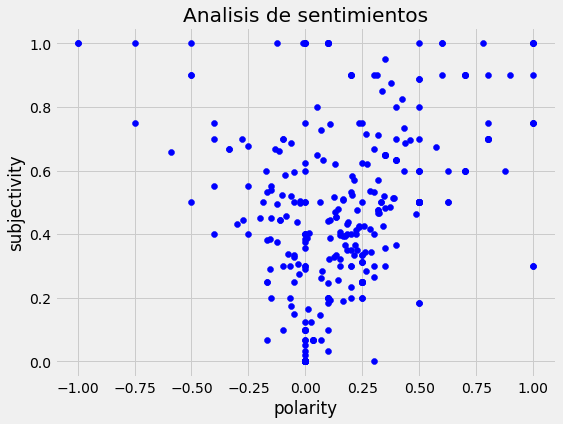

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='blue')

plt.title('Analisis de sentimientos', color='black')
plt.xlabel('polarity', color='black')
plt.ylabel('subjectivity', color='black')
plt.show()

In [ ]:
ptweet = df[df.Analysis == 'Positive']
pteet = ptweet['Tweet']

round(ptweet.shape[0] / df.shape[0] * 100, 1)

44.0

In [ ]:
ntweet = df[df.Analysis == 'Negative']
nteet = ntweet['Tweet']

round(ntweet.shape[0] / df.shape[0] * 100, 1)

13.6

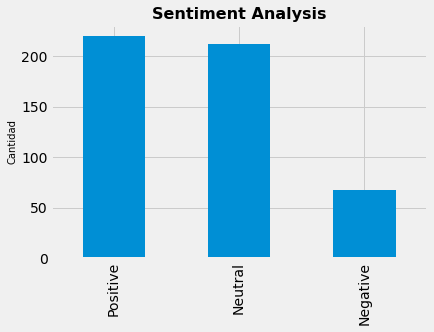

In [ ]:
df['Analysis'].value_counts()

plt.gca().tick_params(axis='x', colors='black')
plt.gca().tick_params(axis='y', colors='black')
plt.title('Sentiment Analysis', fontsize=16, fontweight='bold',color='black')
plt.ylabel('Cantidad', fontsize=10)
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

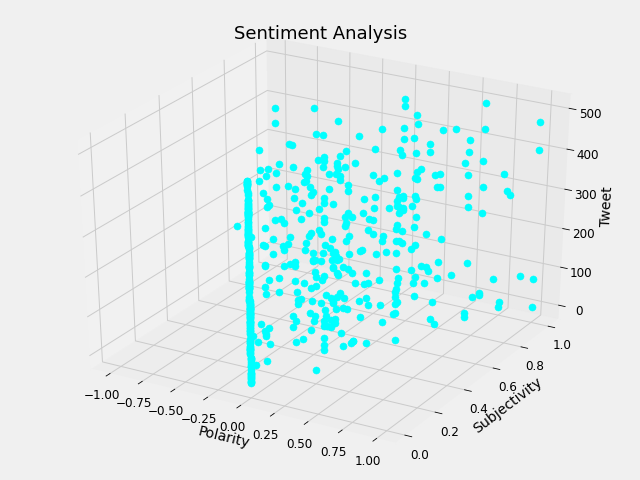

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

for i in range(0, df.shape[0]):
  ax.scatter(df['Polarity'][i], df['Subjectivity'][i], df.index[i], c=df['Polarity'][i], cmap='cool', s=50)

ax.set_title('Sentiment Analysis', fontsize=18)
ax.set_xlabel('Polarity', fontsize=14)
ax.set_ylabel('Subjectivity', fontsize=14)
ax.set_zlabel('Tweet', fontsize=14)
ax.w_xaxis.set_tick_params(labelsize=12)
ax.w_yaxis.set_tick_params(labelsize=12)
ax.w_zaxis.set_tick_params(labelsize=12)

plt.show()
